In [16]:
# Import Libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('float_format', '{:.2f}'.format)
import warnings
import re
import glob
warnings.filterwarnings('ignore')
import string
from wordcloud import WordCloud, STOPWORDS


In [ ]:
# Read CSV
path = r'..\..\dataset\archive'
all_files = glob.glob(path+ "/*.csv")

li =[]

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

trend_videos = pd.concat(li, axis=0, ignore_index=True)

In [18]:
# If video has no description add a generic one
trend_videos["description"] = trend_videos["description"].fillna(value="Video has no description")

In [19]:
# Select the tags and total video view count for the dataframe
cols = ['tags', 'view_count']
vids = trend_videos[cols]

In [20]:
# Create a list containing tuples with the tags for each video and the total video views
tags_with_viewcount_list = list(vids.itertuples(index=False, name=None))

In [21]:
# create a giant dictionary with the tag name for a 
# key and a value that is a list of video views for each time the tag appeared
tag_data = {}


# build list of tags
def buildTagsArray(tagDict):
    tags = []
    for x in tagDict:
        tags.append(x)
    return tags

# find the mean video views for videos that use the tag
def findMean(tagDict):
    averages = []
    for x in tagDict:
        averages.append(sum(tagDict[x])//len(tagDict[x]))
    return averages

# find the median video views for videos that use the tag
def findMedian(tagDict):
    medians = []
    for x in tagDict:
        tagDict[x].sort()
        mid = len(tagDict[x]) // 2
        res = (tagDict[x][mid] + tagDict[x][~mid]) // 2
        medians.append(res)
    return medians

# find the total video views for all videos that use the tag combined
def findTotals(tagDict):
    totals = []
    for x in tagDict:
        totals.append(sum(tagDict[x]))
    return totals

# find the frequency of how often the tags appear in videos
def frequency_used(tagDict):
    count = []
    for x in tagDict:
        count.append(len(tagDict[x]))
    return count

# build the giant dictionary storing tag data
for tags in tags_with_viewcount_list:
    for tag in tags[0].split('|'):

        if tag not in tag_data:
            tag_data[tag] = [tags[1]]
        else:
            tag_data[tag].append(tags[1])


data = {'tag': buildTagsArray(tag_data),
        'frequency_used': frequency_used(tag_data),
        'total_view_count': findTotals(tag_data),
        'mean_view_count': findMean(tag_data),
        'median_view_count': findMedian(tag_data)
        }

# Create a new dataframe that stores the above compiled data
new_df = pd.DataFrame(data, columns =['tag', 'frequency_used', 'total_view_count', 'mean_view_count', 'median_view_count'])

[Text(0.5, 1.0, 'Total View Count By Tag')]

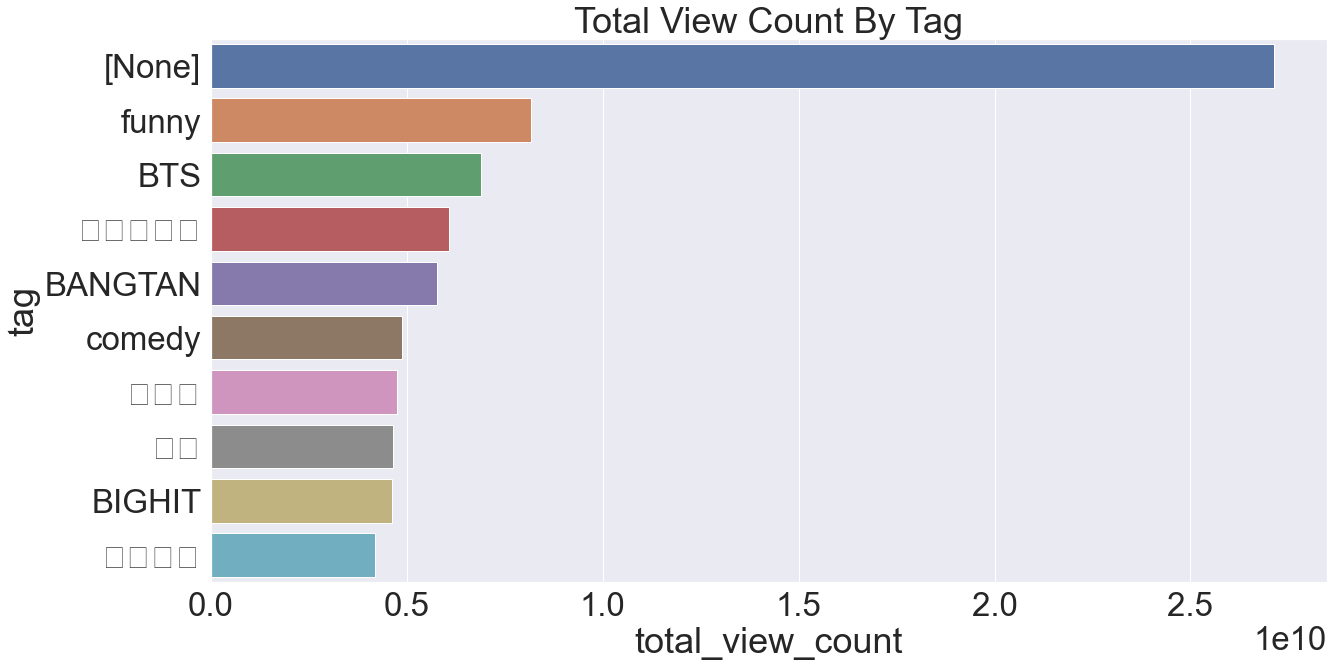

In [22]:
# build a barplot graph that displays the total view count for the tags with the highest total view count
select_cols = ['tag', 'total_view_count']
x = new_df[select_cols].sort_values(by=['total_view_count'], ascending=False).head(10)
sns.set(font_scale=3)
plt.figure(figsize=(20,10))
sns.barplot(data=x, x='total_view_count', y='tag').set(title='Total View Count By Tag')

[Text(0.5, 1.0, 'Frequency of Tag Use')]

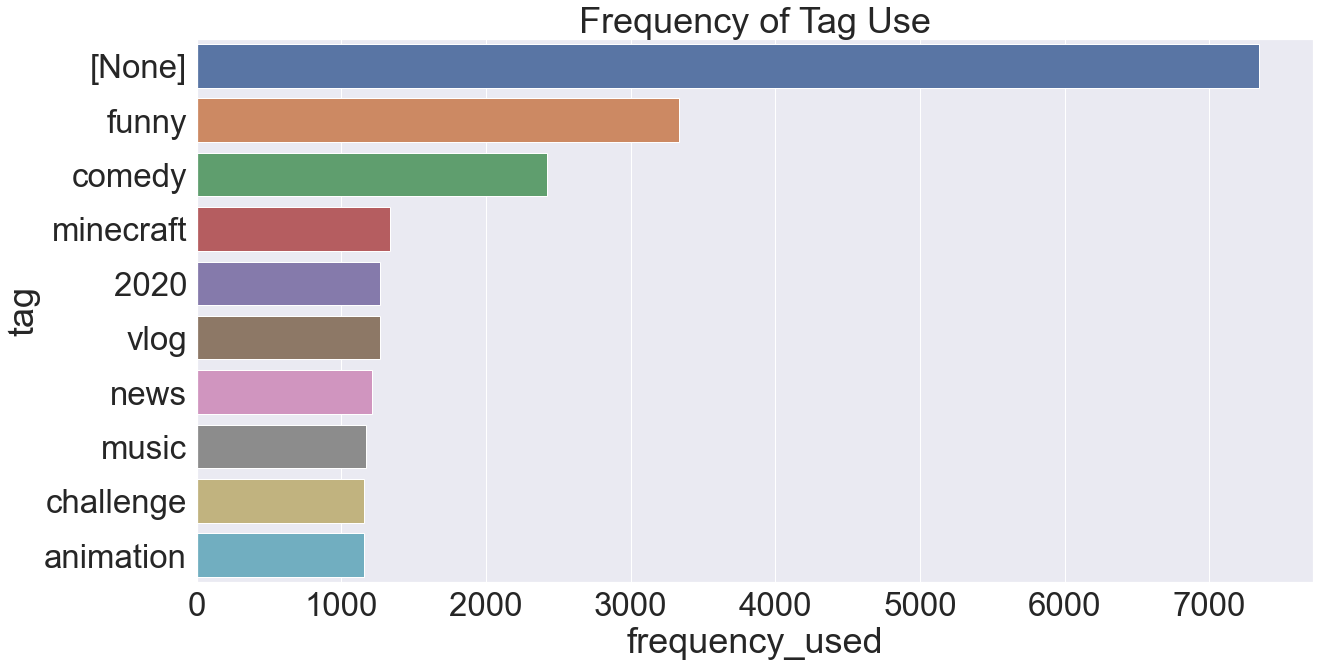

In [23]:
# build a barplot graph that displays the frequency of tag use for the tags that are used the most frequently
select_cols = ['tag', 'frequency_used']
x = new_df[select_cols].sort_values(by=['frequency_used'], ascending=False).head(10)
sns.set(font_scale=3)
plt.figure(figsize=(20,10))
sns.barplot(data=x, x='frequency_used', y='tag').set(title='Frequency of Tag Use')

[Text(0.5, 1.0, 'Mean View Count By Tag')]

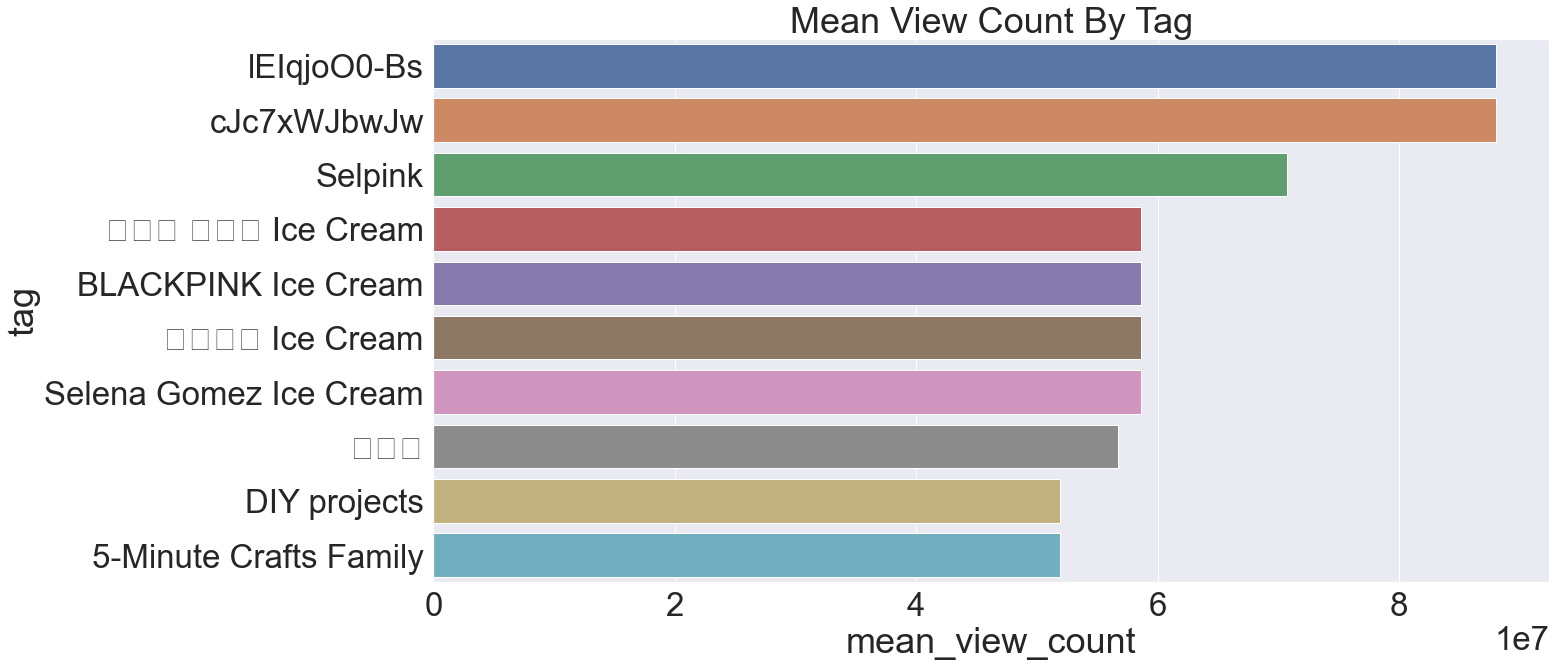

In [24]:
# build a barplot graph that displays the mean view count by tag for the tags with the highest mean view count
select_cols = ['tag', 'mean_view_count']
x = new_df[select_cols].sort_values(by=['mean_view_count'], ascending=False).head(10)
sns.set(font_scale=3)
plt.figure(figsize=(20,10))
sns.barplot(data=x, x='mean_view_count', y='tag').set(title='Mean View Count By Tag')

[Text(0.5, 1.0, 'Medain View Count By Tag')]

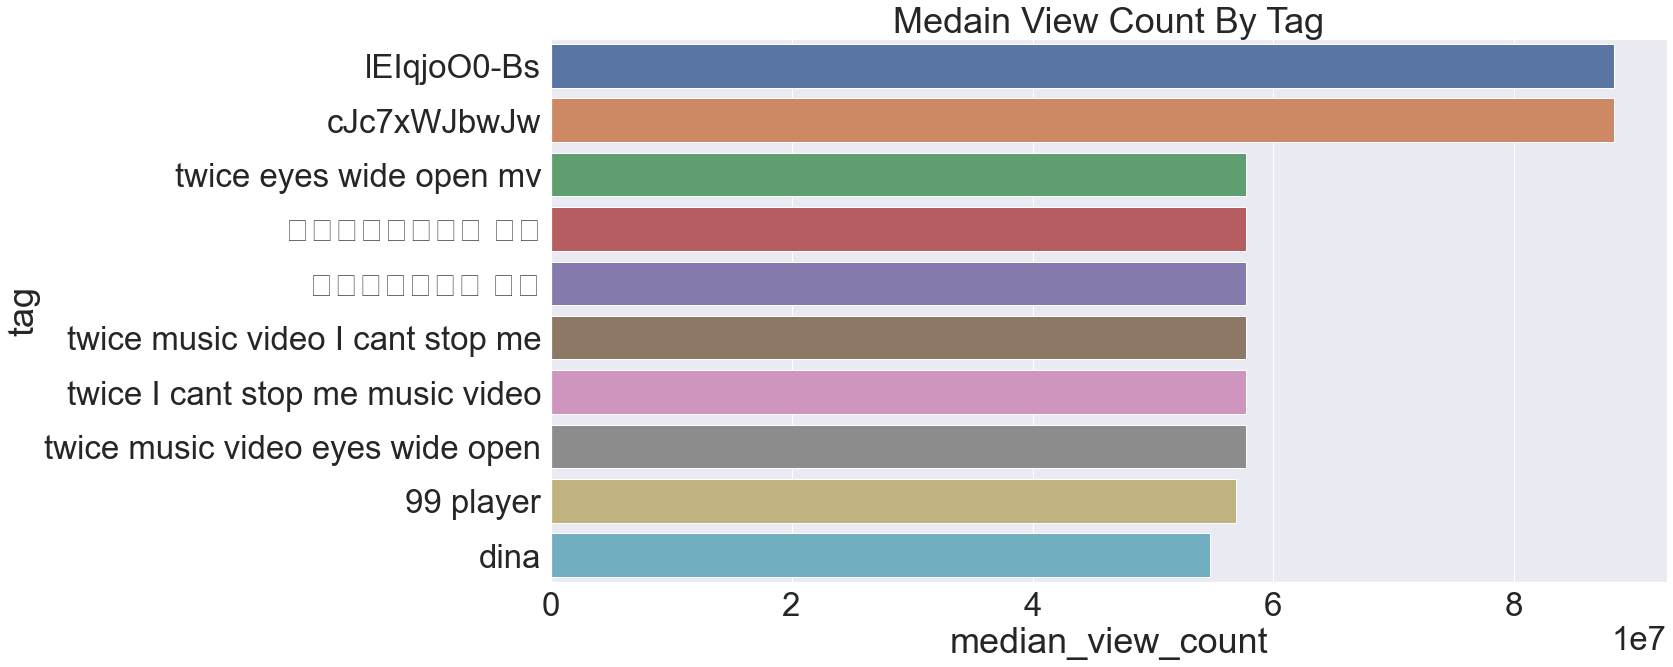

In [25]:
# build a barplot graph that displays the median view count by tag for the tags with the highest median view count
select_cols = ['tag', 'median_view_count']
x = new_df[select_cols].sort_values(by=['median_view_count'], ascending=False).head(10)
sns.set(font_scale=3)
plt.figure(figsize=(20,10))
sns.barplot(data=x, x='median_view_count', y='tag').set(title='Medain View Count By Tag')

(-0.5, 1999.5, 999.5, -0.5)

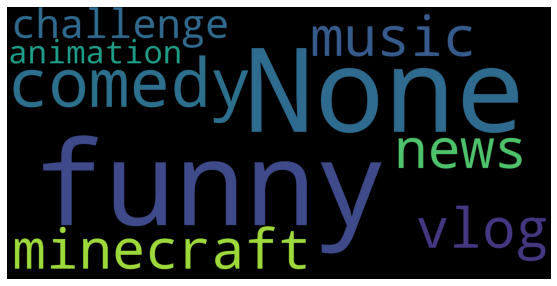

In [26]:
# build a wordcloud that displays the names of the most frequently used tags
select_cols = ['tag', 'frequency_used']

tagData = new_df[select_cols].sort_values(by=['frequency_used'], ascending=False).head(10)

tags_and_frequency = list(tagData.itertuples(index=False, name=None))

tags_only = []

for t in tags_and_frequency:
    tags_only.append(re.sub('[^a-zA-Z]', ' ', t[0]))
 
wordcld = WordCloud(width= 2000, height= 1000, stopwords= set(STOPWORDS)).generate(' '.join(tags_only))
plt.figure(figsize=(15,5))
plt.imshow(wordcld)
plt.axis('off')
